<a href="https://colab.research.google.com/github/SaashaJoshi/keras-mnist-examples/blob/master/fashionMNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [0]:
from keras.datasets import fashion_mnist
(train_images, train_labels), (test_images, test_labels)=fashion_mnist.load_data()

In [5]:
print(train_images.shape)
print(test_images.shape)    #print shape of the train and test dataset

(60000, 28, 28)
(10000, 28, 28)


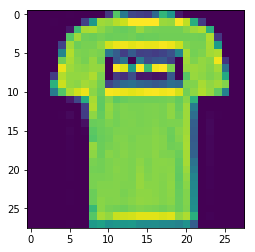

In [39]:
plt.imshow(train_images[1])  #display one of the images from dataset

In [0]:
train_images=train_images.astype('float32')/255
test_images=test_images.astype('float32')/255

In [0]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)), 
    keras.layers.Dense(128, activation=tf.nn.relu), 
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [0]:
model.compile(loss='sparse_categorical_crossentropy', 
             optimizer=keras.optimizers.Adam(), 
             metrics=['accuracy'])

In [13]:
model.fit(train_images, train_labels, epochs=5, batch_size=64)

Epoch 1/5
60000/60000 [==============================] - 3s 47us/sample - loss: 0.2872 - acc: 0.8945
Epoch 2/5
60000/60000 [==============================] - 3s 46us/sample - loss: 0.2722 - acc: 0.9000
Epoch 3/5
60000/60000 [==============================] - 3s 45us/sample - loss: 0.2646 - acc: 0.9021
Epoch 4/5
60000/60000 [==============================] - 3s 45us/sample - loss: 0.2527 - acc: 0.9064
Epoch 5/5
60000/60000 [==============================] - 3s 44us/sample - loss: 0.2452 - acc: 0.9083


In [15]:
test_loss, test_accuracy=model.evaluate(test_images, test_labels)
print('Loss:', test_loss)
print('Accuracy:', test_accuracy)

10000/10000 [==============================] - 0s 45us/sample - loss: 0.3273 - acc: 0.8846
Loss: 0.32734838972091673
Accuracy: 0.8846


In [21]:
predictions=model.predict(test_images)
predictions.shape

(10000, 10)

In [23]:
predictions[1]

array([2.3503415e-04, 2.2209722e-13, 9.9851042e-01, 4.6874117e-08,
       6.9496210e-04, 4.5757474e-11, 5.5952760e-04, 4.8360938e-16,
       5.4492220e-09, 1.3146582e-13], dtype=float32)

In [36]:
np.argmax(predictions[1])

2

In [35]:
test_labels[1]    #equals the argmax of predictions[1] i.e. the maximum probable label of the test_image[1]

2